In [59]:
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns

import statsmodels.api as sm
from sklearn.cross_validation import train_test_split

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

# make plots appear when you call them
%matplotlib inline 

In [60]:
#samp = pd.read_csv("../projects/1stproject/sample_submission.csv")
#test = pd.read_csv("../projects/1stproject/test.csv")
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
# Just looking at train data set that was given to us
train.describe()

/opt/conda/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,NaN,7553.500000,5.000000,5.000000,1954.000000,1967.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,NaN,9478.500000,6.000000,5.000000,1973.000000,1994.000000,NaN,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,NaN,11601.500000,7.000000,6.000000,2000.000000,2004.000000,NaN,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


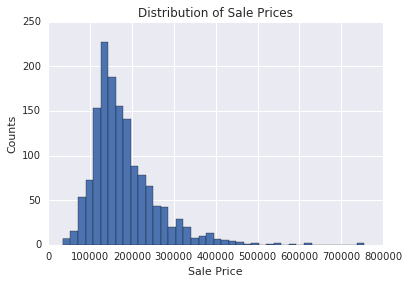

In [8]:
# A look at how housing prices are distributed - was just curious
plt.hist(train['SalePrice'], bins=40)
plt.title("Distribution of Sale Prices")
plt.xlabel("Sale Price")
plt.ylabel("Counts")
plt.show()

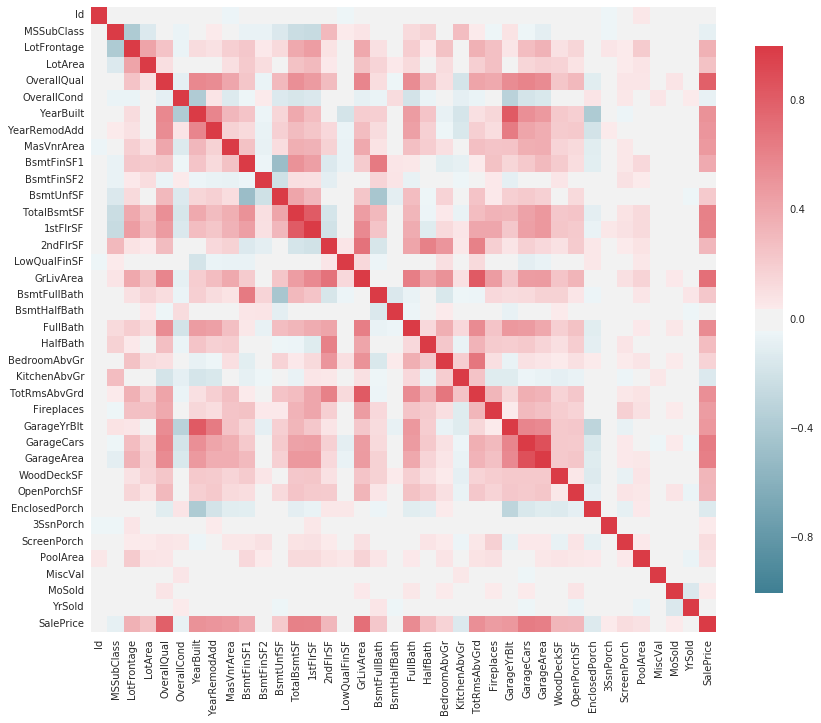

In [9]:
# Creating a correlation plot

sns.set(style="white")

# Generate a large random dataset

# Compute the correlation matrix
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmax=1,
            square=True, cbar_kws={"shrink": .7})

In [10]:
# Listing how attributes are correlated with salesprice - values that are most positively or negatively correlated 1st.
#salescorr['absvalue'] = salescorr[[0]].abs()

#sc = salescorr.sort_values('absvalue', ascending=0, axis = 0)
#sc = sc.drop(sc.index[[0]])
#sc = sc.drop('absvalue', axis = 1)
#sc.columns = ['corr with SalesPrice']
#sc

I want to take a look at some of the qualitative values which are not in the correlation. 

In [11]:
train.select_dtypes(include=['object']).columns.values

array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'], dtype=object)

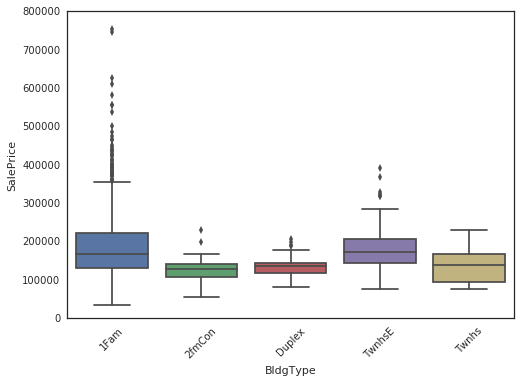

In [12]:
sns.boxplot(x = 'BldgType', y = 'SalePrice',  data = train)
xt = plt.xticks(rotation=45)

This is possible also related to floor space

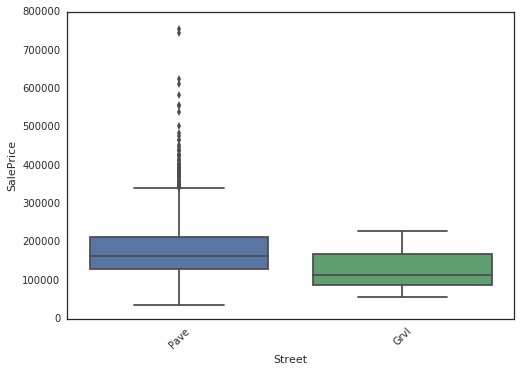

In [13]:
sns.boxplot(x = 'Street', y = 'SalePrice',  data = train)
xt = plt.xticks(rotation=45)

Paved streets seems to imply slightly higher prices.

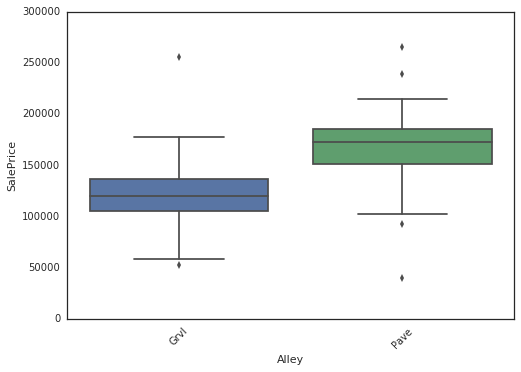

In [14]:
sns.boxplot(x = 'Alley', y = 'SalePrice',  data = train)
xt = plt.xticks(rotation=45)

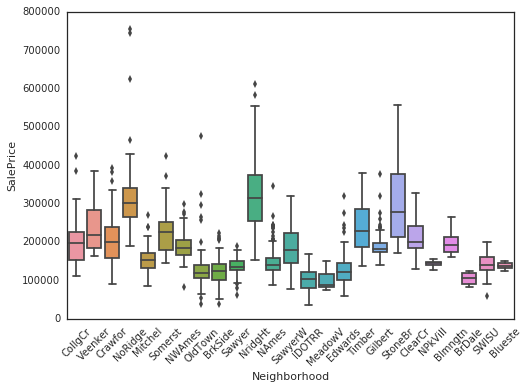

In [15]:
sns.boxplot(x = 'Neighborhood', y = 'SalePrice',  data = train)
xt = plt.xticks(rotation=45)

Sawyer neighborhood seems to be an expensive area. 

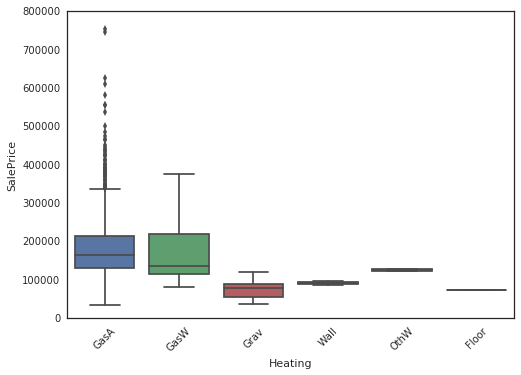

In [16]:
sns.boxplot(x = 'Heating', y = 'SalePrice',  data = train)
xt = plt.xticks(rotation=45)

# Data Cleaning and Factor Engineering

We will first fill in the missing data for: 
    OverallQual, GrLivArea, GarageCars, 
    GarageArea, TotalBsmtSF, FullBath, TotRmsAbvGrd, 
    YearBuilt, YearRemodAdd, GargeYrBlt, MasVnrArea and Fireplaces

Neighborhood

In [17]:
#Use the value of Neighborhood_price to get an idea of how much houses in the neighborhood goes for
train['Neighborhood_price'] = train[['Neighborhood','SalePrice']].groupby('Neighborhood').transform(lambda x: (x.mean())) 
train.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Neighborhood_price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,197965
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,238772
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,197965
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,210624
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,335295


House Style

In [18]:
#New Value for Floors tells you how many living floors there are. Based on HouseStyle feature
train['Floors'] = '0'
train.loc[['SFoyer' in n for n in train['HouseStyle']],'Floors'] = 1
train.loc[['1Story' in n for n in train['HouseStyle']],'Floors'] = 1
train.loc[['SLvl' in n for n in train['HouseStyle']],'Floors'] = 1
train.loc[['1.5Unf' in n for n in train['HouseStyle']],'Floors'] = 1.5
train.loc[['1.5Fin' in n for n in train['HouseStyle']],'Floors'] = 1.5
train.loc[['2Story' in n for n in train['HouseStyle']],'Floors'] = 2
train.loc[['2.5Fin'  in n for n in train['HouseStyle']],'Floors'] = 2.5
train.loc[['2.5Unf' in n for n in train['HouseStyle']],'Floors'] = 2.5

train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Neighborhood_price,Floors
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,197965,2
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,238772,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,197965,2
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,210624,2
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,335295,2


YearSold

In [19]:
#Subtracting 2005 from each year, to make them more useful for linear regression
train['years_since06']= train['YrSold'].subtract(2006, 1)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Neighborhood_price,Floors,years_since06
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2008,WD,Normal,208500,197965,2,2
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,2007,WD,Normal,181500,238772,1,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,2008,WD,Normal,223500,197965,2,2
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,2,2006,WD,Abnorml,140000,210624,2,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,12,2008,WD,Normal,250000,335295,2,2


Kitchen Quality

In [20]:
train['kitchen_ranking'] = '0'
train.loc[['Ex' in n for n in train['KitchenQual']],'kitchen_ranking'] = 5
train.loc[['Gd' in n for n in train['KitchenQual']],'kitchen_ranking'] = 4
train.loc[['TA' in n for n in train['KitchenQual']],'kitchen_ranking'] = 3
train.loc[['Fa' in n for n in train['KitchenQual']],'kitchen_ranking'] = 2
train.loc[['Po' in n for n in train['KitchenQual']],'kitchen_ranking'] = 1
train.loc[['NA' in n for n in train['KitchenQual']],'kitchen_ranking'] = 0

train.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Neighborhood_price,Floors,years_since06,kitchen_ranking
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,2,2008,WD,Normal,208500,197965,2,2,4
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,5,2007,WD,Normal,181500,238772,1,1,3
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,9,2008,WD,Normal,223500,197965,2,2,4
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,2,2006,WD,Abnorml,140000,210624,2,0,4
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,12,2008,WD,Normal,250000,335295,2,2,4


FirePlace Quality

In [21]:
train['fire_rank'] = '0'
train.loc[["Ex" in str(n) for n in (train['FireplaceQu'])],'fire_rank'] = 5
train.loc[["Gd" in str(n) for n in (train['FireplaceQu'])],'fire_rank'] = 4
train.loc[["TA" in str(n) for n in (train['FireplaceQu'])],'fire_rank'] = 3
train.loc[["Fa" in str(n) for n in (train['FireplaceQu'])],'fire_rank'] = 2
train.loc[["Po" in str(n) for n in (train['FireplaceQu'])],'fire_rank'] = 1
train.loc[["NA" in str(n) for n in (train['FireplaceQu'])],'fire_rank'] = 0

train.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Neighborhood_price,Floors,years_since06,kitchen_ranking,fire_rank
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,2,2008,WD,Normal,208500,197965,2,2,4,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,5,2007,WD,Normal,181500,238772,1,1,3,3
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,9,2008,WD,Normal,223500,197965,2,2,4,3
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,2,2006,WD,Abnorml,140000,210624,2,0,4,4
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,12,2008,WD,Normal,250000,335295,2,2,4,3


In [22]:
train[train.Alley.notnull()].Street.unique()
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Neighborhood_price,Floors,years_since06,kitchen_ranking,fire_rank
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,2,2008,WD,Normal,208500,197965,2,2,4,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,5,2007,WD,Normal,181500,238772,1,1,3,3
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,9,2008,WD,Normal,223500,197965,2,2,4,3
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,2,2006,WD,Abnorml,140000,210624,2,0,4,4
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,12,2008,WD,Normal,250000,335295,2,2,4,3


In [23]:
train['Floors'] = train['Floors'].astype(float)
train['kitchen_ranking'] = train['kitchen_ranking'].astype(float)
train['fire_rank'] = train['fire_rank'].astype(float)


In [146]:
train = train.drop('Id', 1)
train['SalePrice'] = np.log(train['SalePrice']+1)
train = train.select_dtypes(include=['float64', 'int64'])
train = train.fillna(train.mean())
train.dtypes

MSSubClass              int64
LotFrontage           float64
LotArea                 int64
OverallQual             int64
OverallCond             int64
YearBuilt               int64
YearRemodAdd            int64
MasVnrArea            float64
BsmtFinSF1              int64
BsmtFinSF2              int64
BsmtUnfSF               int64
TotalBsmtSF             int64
1stFlrSF                int64
2ndFlrSF                int64
LowQualFinSF            int64
GrLivArea               int64
BsmtFullBath            int64
BsmtHalfBath            int64
FullBath                int64
HalfBath                int64
BedroomAbvGr            int64
KitchenAbvGr            int64
TotRmsAbvGrd            int64
Fireplaces              int64
GarageYrBlt           float64
GarageCars              int64
GarageArea              int64
WoodDeckSF              int64
OpenPorchSF             int64
EnclosedPorch           int64
3SsnPorch               int64
ScreenPorch             int64
PoolArea                int64
MiscVal   

In [24]:
# These are the variables we will check.
to_check = train.loc[0:]
to_check.drop('SalePrice', 1)
to_check.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Neighborhood_price,Floors,years_since06,kitchen_ranking,fire_rank
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,2,2008,WD,Normal,208500,197965,2.0,2,4.0,0.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,5,2007,WD,Normal,181500,238772,1.0,1,3.0,3.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,9,2008,WD,Normal,223500,197965,2.0,2,4.0,3.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,2,2006,WD,Abnorml,140000,210624,2.0,0,4.0,4.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,12,2008,WD,Normal,250000,335295,2.0,2,4.0,3.0


In [61]:
# Combining the train & test data in one data frame
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

In [62]:
## Do the Log transform for the data to get normalized features

#log transform the y:
train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
## Find the index of all numerical features
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

## calling those with the index we found are numerical
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness

## get the ones with high skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

## Call the skewed numerical features by index
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [63]:
# Setting dummy values for categorical cols.
all_data = pd.get_dummies(all_data)

In [64]:
# Filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

In [65]:
# Creating matrices:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [66]:
# Since the correlations between the highly correlated variables may affect the result a lot,
# we don't want to pick the variables just by the correlations, but use Regularized linear models to select the ones for us.

from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.cross_validation import cross_val_score

## Create a function for evaluating the model
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="mean_squared_error", cv = 5))
    return(rmse)


In [67]:
# First we use Ridge.
model_ridge = Ridge()
# Setting the tuning para for Ridge as following:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
# alpha too small--regularization too strong, less flexible;
# alpha too large--overfit.
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

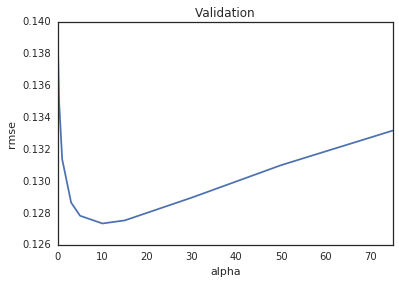

In [68]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [69]:
# from above we can see that the lowest rmse occurs at about alpha = 10.
cv_ridge.min()

0.12733734668670757

In [70]:
# Now try Lasso
# Lasso has a feature that can find the best alpha for us to use
# Use built in CV of lasso here:
# Setting alphas as inverse of ones in Ridget:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)

In [71]:
rmse_cv(model_lasso).mean()

0.12314421090977457

In [72]:
# the rmse looks good, so we show the coefficient here:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
# We want to know the number of vars that Lasso chose for us:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 110 variables and eliminated the other 178 variables


In [73]:
# Take a look at the coefficients
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

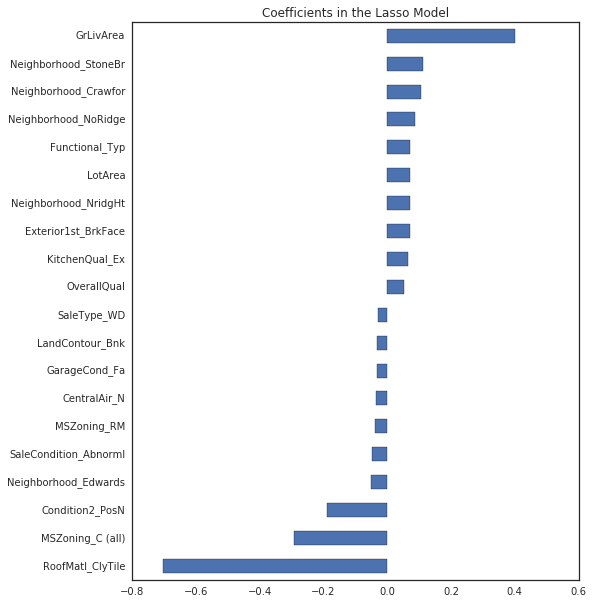

In [74]:
# Plot the coefficients out to see which one is the most important var.
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

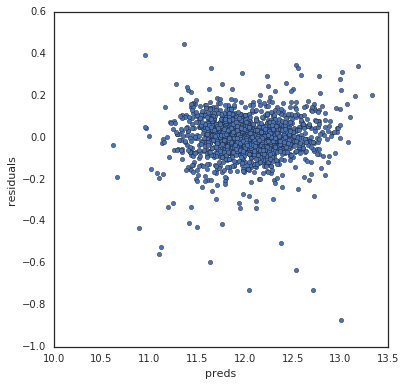

In [75]:
# Check the residuals:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]

preds.plot(x = "preds", y = "residuals",kind = "scatter")

In [ ]:
# The residuals looks good--they are symmetrically distributed about 0, 
# tending to cluster towards the middle of the plot, which means this model could be a good fit to our data.

In [44]:
# This will organize the entries of to_check into arrays and calculate the beta values of the regression line.

data_to_lists = [train[column] for column in list(to_check.columns)]
organized_lists = []
for i in range(0, len(data_to_lists[0])):
    temp = []
    for j in range(0, 5):
        temp.append(int(data_to_lists[j][i]))
    organized_lists.append(temp)

sale_prices = train['SalePrice']
sale_prices_list = [int(price) for price in sale_prices]

X = np.array(organized_lists)
y = np.array(sale_prices_list)

betas = np.linalg.inv(X.T @ X) @ X.T @ y

print(betas)

KeyError: 'Neighborhood_price'

In [149]:
# This will calculate the RMSE of betas.

y_hat = X @ betas

diffs = y_hat - y
diffs_squared = [i ** 2 for i in diffs]

rmse = ((sum(diffs_squared)) / len(diffs_squared)) ** (1/2)
print(rmse)

1.30900995797


In [150]:
# This will calculate the OLS regression.

local_train, local_test = train_test_split(train.loc[0:, ['SalePrice', 'Neighborhood_price', 'Floors', 'years_since06', 'kitchen_ranking', 'fire_rank']], test_size=0.2, random_state=1111)

local_train_y = local_train["SalePrice"]
local_train_x = local_train.drop(["SalePrice"],axis=1)
local_test_y = local_test["SalePrice"]
local_test_x = local_test.drop("SalePrice",axis=1)

clf = sm.OLS(local_train_y.astype(float),local_train_x.astype(float))
result = clf.fit()
preds = result.predict(local_test_x.astype(float))

print(preds)

[ 12.19769735  12.76435923  11.55975121  12.10469239   9.97465512
  14.00475858   9.71552975  12.54226103  15.36118894  11.81649053
  15.28255864  12.6786885   10.62933157   9.70744765  14.00475858
  12.40698769  12.1916814    9.28725375  13.97805556  11.62187602
  15.3179831   14.39298544  11.64887272  15.84656805   9.58876962
   9.48206683  13.84902881   7.94253747   9.40583572  10.75001391
  13.85610112  10.43766034  16.44158449  11.99912802  12.2406685
  12.23662653  13.9948125    9.48206683  16.16281137  11.80876572
  12.08999235  11.90316385  11.70468094  11.01722139  11.00949658
  11.80913861  10.12318457  10.47469157  10.28368925  14.2981631
  10.55089673  10.28368925  12.42090976  11.98677916   9.67304319
   9.20021088   9.07885962  10.28368925  11.97320497   9.17299993
  12.15990317   9.7982842   10.1229141    9.48206683  12.94237267
  13.18690641  13.90511102  12.11807651  12.38528399  10.20093481
   7.51712147  12.38528399  10.2418626    9.78706848  12.60314968
   9.4820668

In [151]:
# This will calculate the RMSE of the predictions.

diffs = local_test_y - preds
diffs_squared = [i ** 2 for i in diffs]

rmse = ((sum(diffs_squared)) / len(diffs_squared)) ** (1/2)
print(rmse)

1.74393924172
